# BLM_1: Basic signal spectral analysis

The following shows some basic steps that one undertakes for signal processing. 

In [27]:
# loading basic modules
import numpy as np
import matplotlib.pyplot as plt

Simulation of sound wave

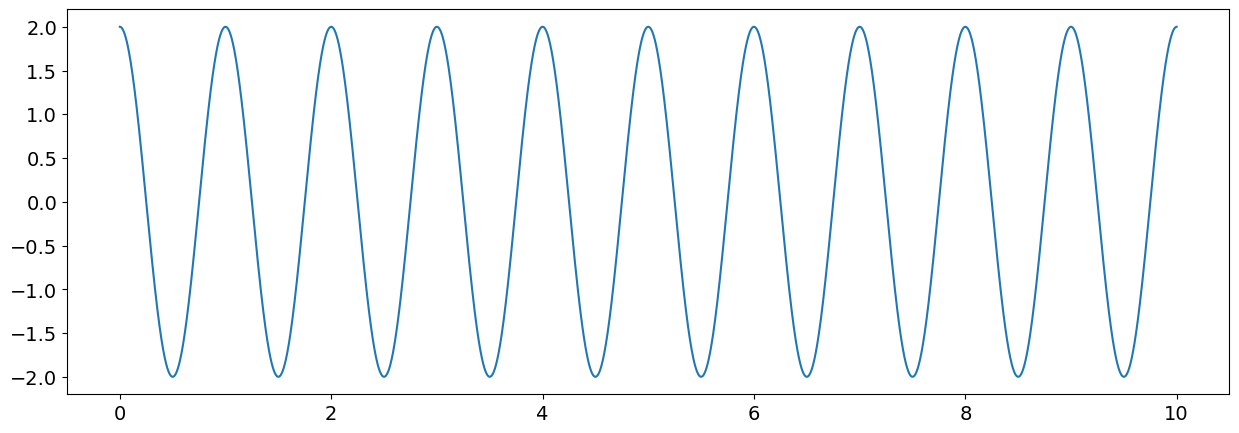

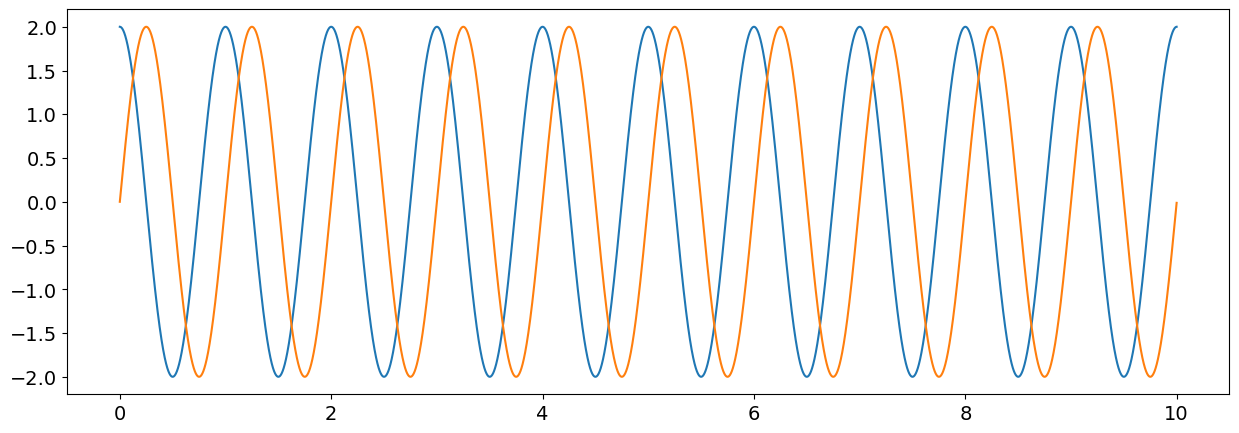

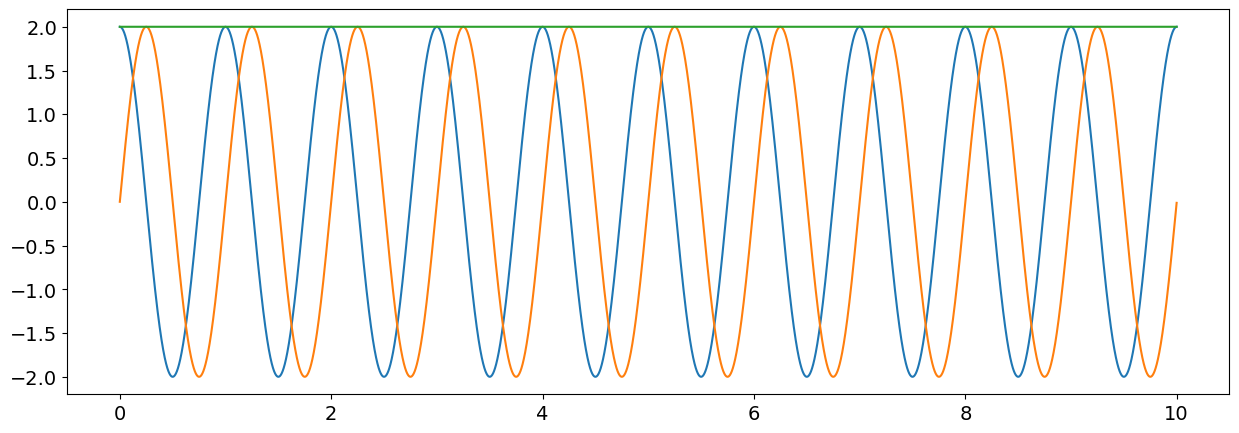

In [28]:
# creation of time vector
fs = 1024
nd = int(10*fs)
tt = np.arange(nd)/fs

# creation of cosine signal
amp=2
xx = amp*np.cos(2*np.pi*tt)

# plot signal
fig = plt.figure("figsize",[15,5])
plt.plot(tt,xx);
plt.show();

#creation of sine signal
yy = amp*np.sin(2*np.pi*tt)

fig = plt.figure("figsize",[15,5])
plt.plot(tt,xx);
plt.plot(tt,yy);
plt.show();

#estimation of mangnitude
zz=np.sqrt(xx**2+yy**2)

fig = plt.figure("figsize",[15,5])
plt.plot(tt,xx);
plt.plot(tt,yy);
plt.plot(tt,zz);
plt.show();

In [29]:
print(np.mean(xx),np.mean(yy))
print(np.mean(xx**2),np.mean(yy**2))

-8.326672684688674e-17 -1.1102230246251566e-17
1.9999999999999996 2.0


### Observations
- the mean of a sinosoidal wave is zero
- the mean of the signals squared is equal to the amplitude. 

## Complex numbers
The following mathematical excurse is helpful for further spectral analysis

Let
\begin{equation}
    x=\cos(\phi)
\end{equation}
and
\begin{equation}
    y=\sin(\phi)
\end{equation}

Define a complex signal (real plus imaginary)
\begin{equation}
z=(\cos(\phi)+i\sin(\phi)) = \exp(i\phi)= e^{-i\phi}
\end{equation}

where $i$ is defined such that
\begin{equation}
i^2 = -1
\end{equation}

Define the conjugate of a complex signal
\begin{equation}
z^*=(\cos(\phi)-i\sin(\phi)) = \exp(-i\phi) = e^{-i\phi}
\end{equation}

Define absolute squared complex value by signal multiplied with its conjugate
\begin{equation}
|z|^2 = z z^* = (\cos(\phi)+i\sin(\phi))(\cos(\phi)-i\sin(\phi))
\end{equation}

then
\begin{equation}
|z|^2 =  \cos^2(\phi)+i\sin(\phi)\cos(\phi)-i\cos(\phi)\sin(\phi)-i^2\sin^2(\phi)
\end{equation}
or
\begin{equation}
|z|^2 =  \cos^2(\phi)+\sin^2(\phi) =1
\end{equation}

Alternative method
\begin{equation}
|z|^2 =  e^{i\phi}e^{-i\phi} = e^{i\phi-i\phi} =e^0= 1
\end{equation}

Complex notation simplifies mathematics, but for physical phenomena only the real part is of relevance


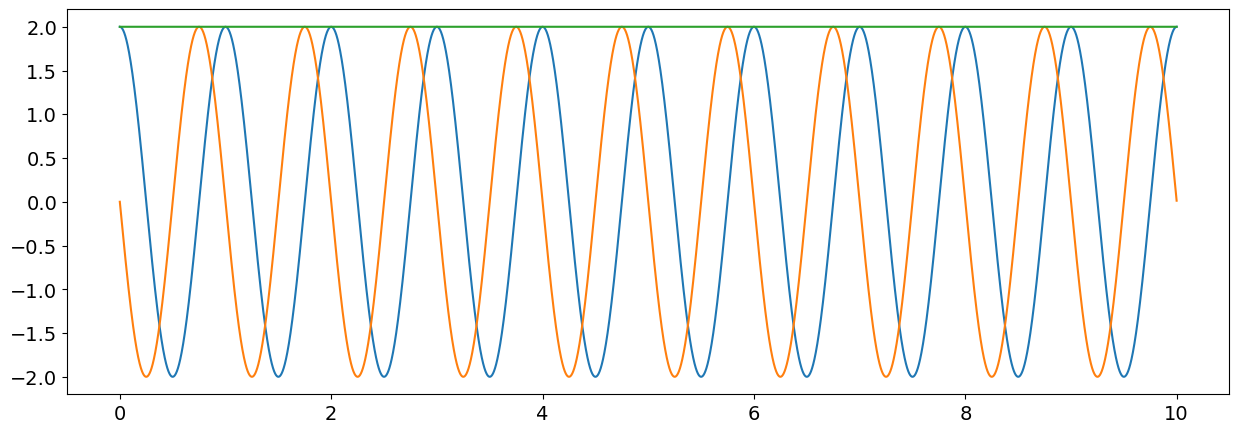

In [30]:
# creation of complex signal (note 1j )
xx = amp*np.exp(-2*np.pi*1j*tt)

# plot signal
fig = plt.figure("figsize",[15,5])
plt.plot(tt,np.real(xx));
plt.plot(tt,np.imag(xx));
plt.plot(tt,np.abs(xx));
plt.show();


## General frequencies

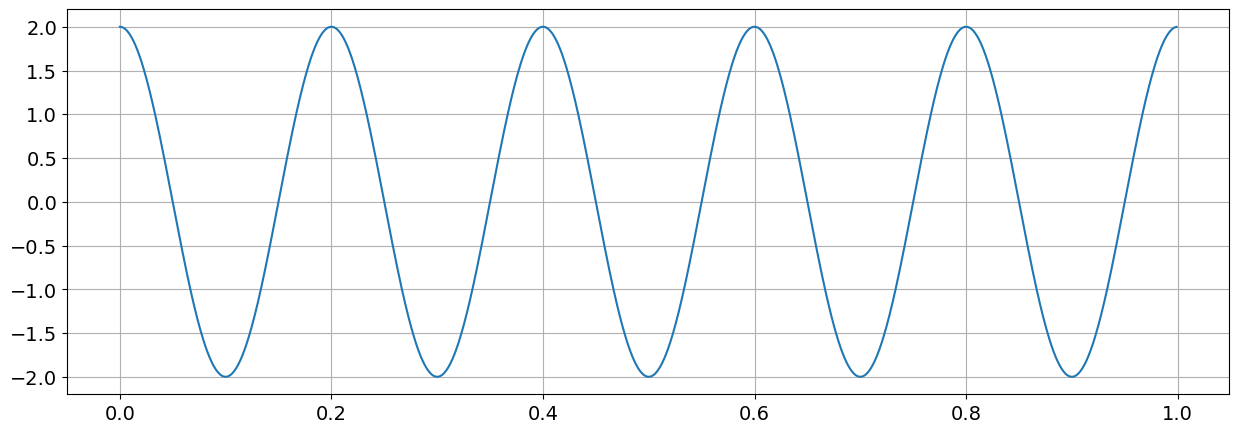

In [31]:
# creation of a 1 second time vector 
fs = 1024 # sampling per second
nd = int(1*fs)
tt = np.arange(nd)/fs

# signal frequency
fo = 5
xx=amp*np.exp(-2*np.pi * 1j *fo*tt)

# plot signal
fig = plt.figure("figsize",[15,5])
plt.plot(tt,np.real(xx));
plt.grid(True)
plt.show()

## Frequency analysis

### Discrete Fourier transform (DFT)

In [32]:
w4=np.exp(2*np.pi*1j *4*tt)
w5=np.exp(2*np.pi*1j *5*tt)
w6=np.exp(2*np.pi*1j *6*tt)

y4=np.sum(xx*w4)
y5=np.sum(xx*w5)
y6=np.sum(xx*w6)

print(y4,y5,y6)

(-5.684341886080802e-14+0j) (2048+0j) (-1.1368683772161603e-13+1.1368683772161603e-13j)


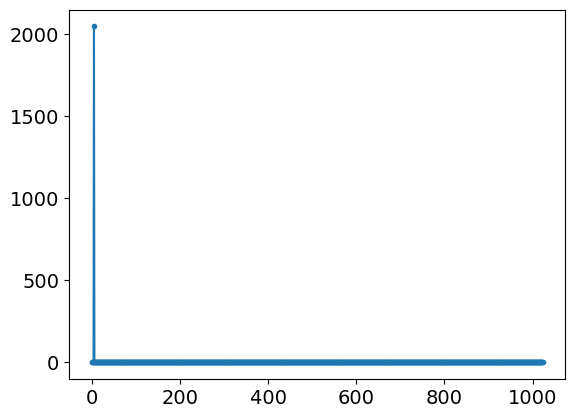

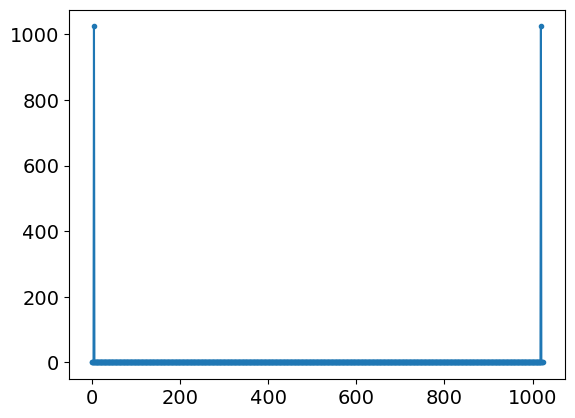

In [33]:
# matrix of spectral analysis vectors
W=np.exp(2*np.pi*1j *np.outer(np.arange(fs),tt))

yy1=W @ xx
plt.plot(np.abs(yy1),'.-');
plt.show()

yy2=W @ np.real(xx)
plt.plot(np.abs(yy2),'.-');
plt.show()


In [34]:
print(np.where(np.abs(yy1)>np.max(np.abs(yy1))/2))
print(np.where(np.abs(yy2)>np.max(np.abs(yy2))/2))


(array([5], dtype=int64),)
(array([   5, 1019], dtype=int64),)


### Observation
- complex signal (cos and sin) peak is at correct frequency (5) with peak amplitude that correspond to the length of the DFT
- for real signals there are two peaks with half the amplitude at frequencies 5 and 1019 = (1024-5). The second peak is allso called negative frequency
- the peak amplitude value of the spectrum of the complex signal is amp*length(fft)
- the peak amplitude values of the spectrum of the real signal is (amp/2)*length(fft)


## Fast Fourier Transform

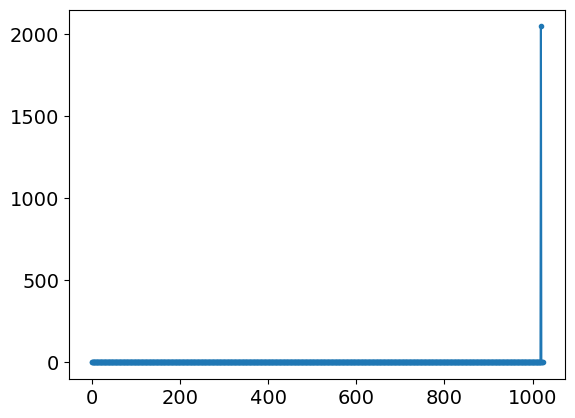

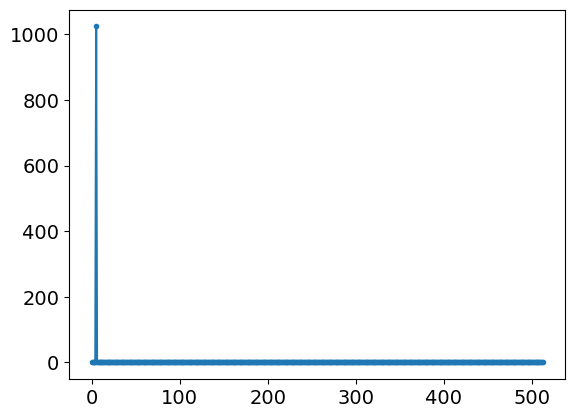

In [35]:
# generic complex to complex fft
yy=np.fft.fft(xx)

plt.plot(np.abs(yy),'.-');
plt.show()

# special real to complex fft
yy0=np.fft.rfft(np.real(xx))

plt.plot(np.abs(yy0),'.-');
plt.show()


### Comments 
- For a complex sinusoidal signal the Python FFT gives a negative frequency (fs-5 = 1019)
- a special version of the FFT call rfft gives only the positive frequencies (x-axis only up to fs/2 and not fs)

### FFT implementation
To see how FFT is implemented ($\exp(2\pi i nm/N)$ or $\exp(-2\pi i nm/N)$) we fourier transform a time series where only a single sample is set to a non-zero value (say sample 1 set to one)

In the case of a DFT we note that for a single sample 
\begin{equation}
y(m)= \sum_{n=0}^{N-1}x(n)\exp(2\pi i nm/N)
\end{equation}
would become
\begin{equation}
y(m)= \exp(2\pi i m/N)= \cos(2\pi m/N)+1i\sin(2\pi m/N)
\end{equation}

taking the inverse DFT
\begin{equation}
x(n)= \sum_{m=0}^{M-1}\exp(2\pi i m/N)\exp(-2\pi i nm/N)=\sum_{m=0}^{M-1}\exp(2\pi i (1-n)m/N)
\end{equation}

which results to
\begin{equation}
x(n) = M\delta_{n,1}
\end{equation}
or $x(1)=M$ and $x(n)=0$ for $n \ne 1$

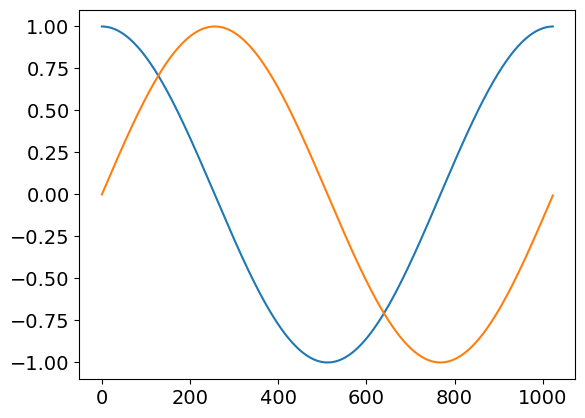

'DFT' peak:  1024.0


In [36]:
# 
v1 = np.exp(2*np.pi*1j*np.arange(1024)/1024)
plt.plot(np.real(v1))
plt.plot(np.imag(v1))
plt.show()

u1=np.sum(v1*np.exp(-2*np.pi*1j*np.arange(1024)/1024))
print("'DFT' peak: ", np.real(u1))


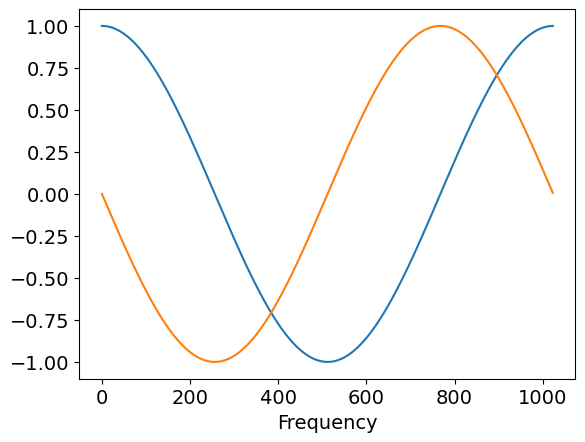

FFT peak:  1.0 1.0


In [37]:
uu=np.zeros(1024,complex)
uu[1]=1
vv=np.fft.fft(uu)

plt.plot(np.real(vv));
plt.plot(np.imag(vv));
plt.xlabel("Frequency");
plt.show()

ww=np.fft.ifft(vv)
print("FFT peak: ",np.real(uu[1]),np.real(ww[1]))


### Observation
The FFT spectrum of a signle sample is  $\cos(2\pi m/N) -i  \sin(2\pi m/N)$  contrary to the DFT used above that was using  $\cos(2\pi m/N) +i  \sin(2\pi m/N)$ . This selection $+i$ or $-1$ is purely a matter of cenvention. In practical terms it means that a decision has to be made if the 'non-real' imaginary signal is trailing ($+i$) or leading $-i$ the real signal.

As we are dealing mostly real signals and use the special rfft that only results in positive frequencies, we have not to worry about this ambiguity.

While the spectra of the FFT and DFT are equivalent (equal when ignoring the different sign of the imaginary part), the inverse FFT produces the correct original time series, while the DFT

### General signal frequency
So far, the frequency was chosen to be an integer. In the following we relax this and use a nom-inter freqiency $f_o = 5.5$ 

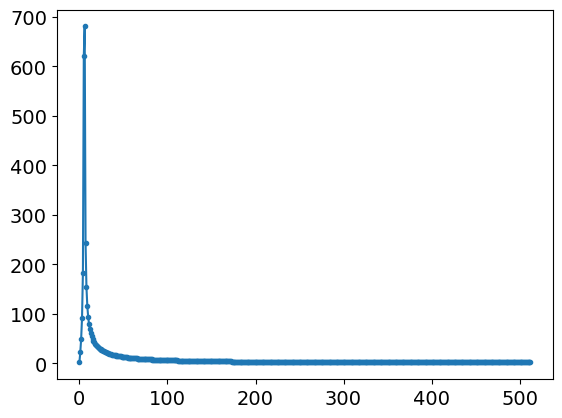

In [38]:
# signal frequency 
fo = 5.5
xx=amp*np.exp(-2*np.pi*1j *fo*tt)

yy3=np.fft.rfft(np.real(xx))

plt.plot(np.abs(yy3),'.-');
plt.show()

### Observations
Using a fractional frequency (5.5 instead of 5) different effects occur
- peak is reduced to less than 700
- peak is wider
- most frequencies are not zero

### Conclusions
When using fractional frequencies the energy (power) of the signal is leaked to other frequencies.

### Spectral leakeage

The widening of the spectral peek occurs together with reduction in peak power and an increase for off-signal frequencies. A condition that is called spectral leakage.

One notes that the integral value of the spectral energy remains constant at `(amp/2)*length(FFT)`

In [39]:
print(np.sqrt(np.sum(np.abs(yy0)**2)),np.sqrt(np.sum(np.abs(yy3)**2)))

1024.0 1024.0019531231374


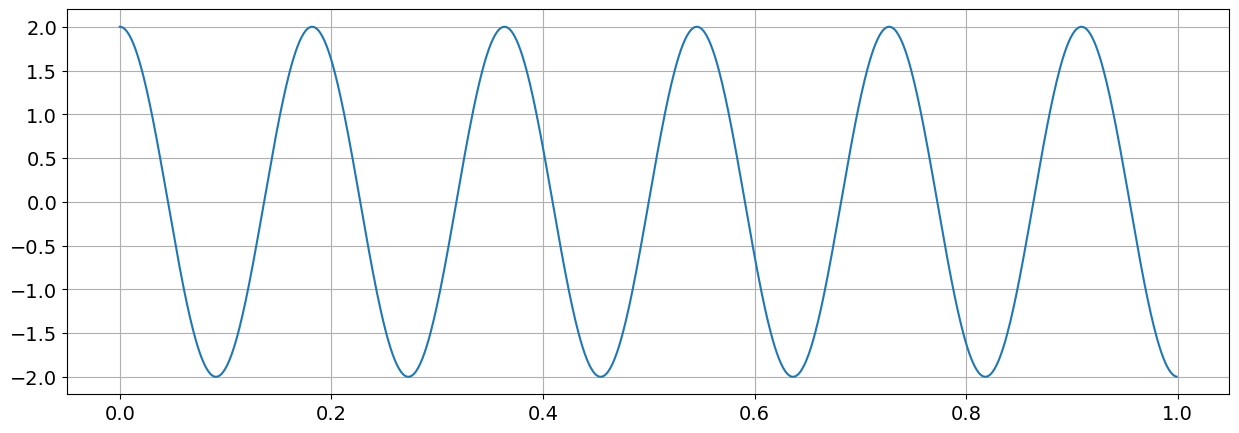

In [40]:
yy3=np.fft.rfft(np.real(xx))
xx3=np.fft.irfft(yy3)

# plot signal
fig = plt.figure("figsize",[15,5])
plt.plot(tt,np.real(xx3));
plt.grid(True)
plt.show()

### Observation
The inverse FFT of the complex spectrum generates the original time series, even if the spectrum is spead out over a wider frequency range.


## Noise processing
We now add noise to the sinusoidal signal

Signal RMS :  2.0 2.0
Noise  531.3710696657041 Peak  2148631.2487445013


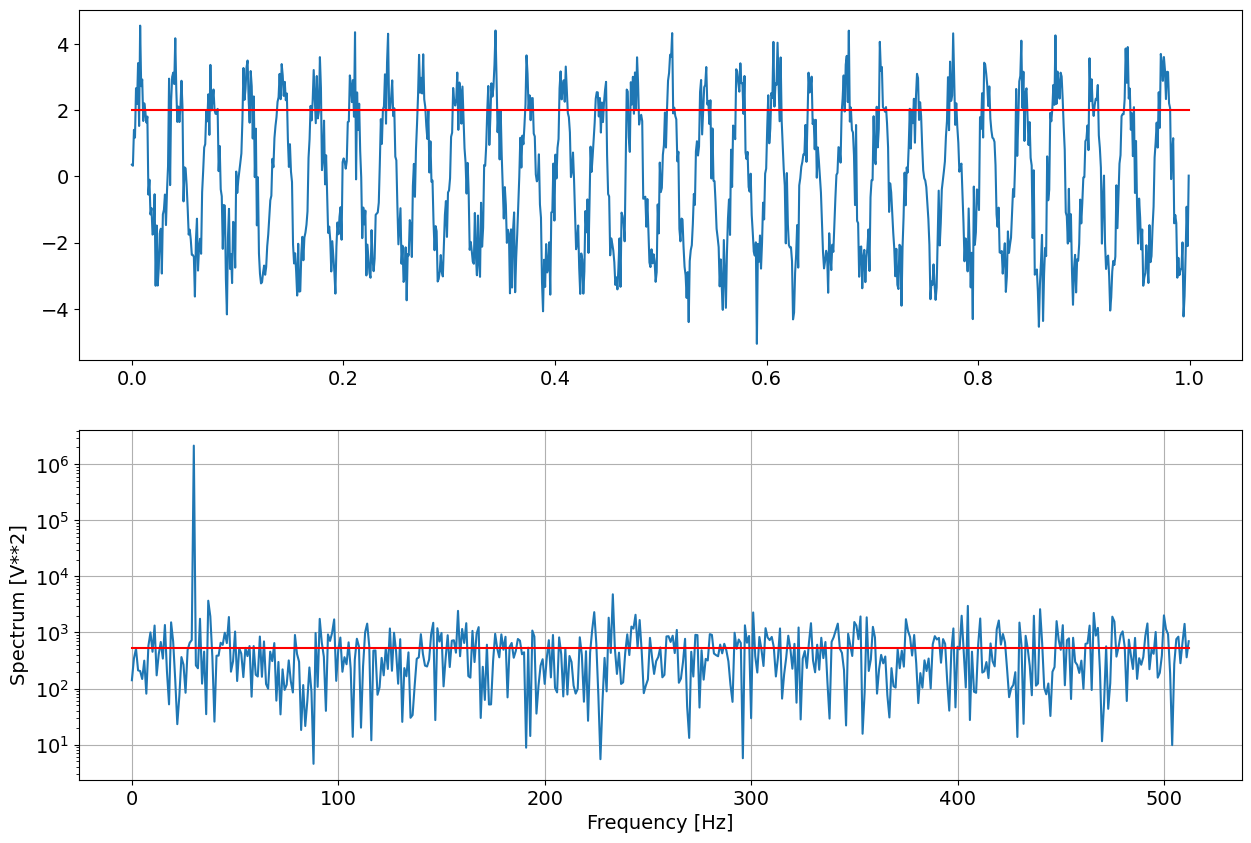

In [41]:
plt.rcParams.update({'font.size': 14}) # increase fontsize in figures

fs = 1024   #Hz
nfft=1024
nwin=nfft

#    Generate a 1 second test signal, a 2 Vrms sine wave at fs/8, corrupted by
#    0.001 V**2/Hz of white noise sampled at  1.024 kHz.

N = fs
time = np.arange(N) / fs

# signal description
arms=2
amp = arms*np.sqrt(2)
freq = 30

var = 0.001
noise_power = var * fs / 2 
# The factor of fs/2 converts the per sample noise power (variance) to a noise bandwith of -1/T to 1/T (negative and positive frequencies) 

xx = amp*np.sin(2*np.pi*freq*time)
rms= np.sqrt(np.mean(xx**2))

# add noise to signal
xx += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

print("Signal RMS : ",amp/np.sqrt(2), rms)

#
yy=np.fft.rfft(xx,nfft)
pp=np.abs(yy)**2

ff=np.arange(int(nfft/2)+1)*fs/nfft

ppmn=np.mean(pp[ff>50])
ppmx = np.max(pp)
print("Noise ",ppmn, "Peak ",ppmx)

fig = plt.figure("figure.figsize",[15,10])

plt.subplot(211)
plt.plot(time,xx)
plt.plot(time,amp/np.sqrt(2)+0*time,'r')

plt.subplot(212)
plt.semilogy(ff, pp)
plt.plot(ff,ppmn+0*ff,'r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Spectrum [V**2]')
plt.grid(True)

In [42]:
print(var, 2*ppmn/(N**2))
print(arms, ppmx/(N**2))

0.001 0.0010135098832429964
2 2.0490944373555195


### Observation
To obtain noise spectrum (variance per sample), the mean value of the rfft power spectrum must be scaled by $2/N^2$ 
To obtain the RMS of the signal, the peak value of the rfft power spectrum must be scaled by $1/N^2$ 

The extimates are not exactly equal as the noise is random and consequently also all extimates of noisy data are randomvariables.

## Spectrum implementation
For future spectral analysis we can define the following support function that scales the power spectrum accordingly

In [43]:
# initial custom spectrum estimation
def mSpectrum0(xx,nfft,fs,mode=None):
    # xx: real valued time series if at least nfft samples
    # nfft: length of fft in samples
    # fs: sampling frequency
    # mode: RMS for scaling of spectral peakes to signal RMS
    #       VAR for scaling of spectral mean values to per sample variance
    #       None for power spectrum (FFT output) (Default)
    # output: P power estimates according to mode
    #         ff frequency vector
    yy=np.fft.rfft(xx[:nfft],nfft)
    ff=np.arange(int(nfft/2)+1)*fs/nfft

    pp=np.abs(yy)**2
    if mode=="RMS":
        return pp/(nfft**2), ff
    elif mode=="VAR":
        pp[1:] *= 2
        return pp/(nfft**2), ff
    else:
        return pp, ff


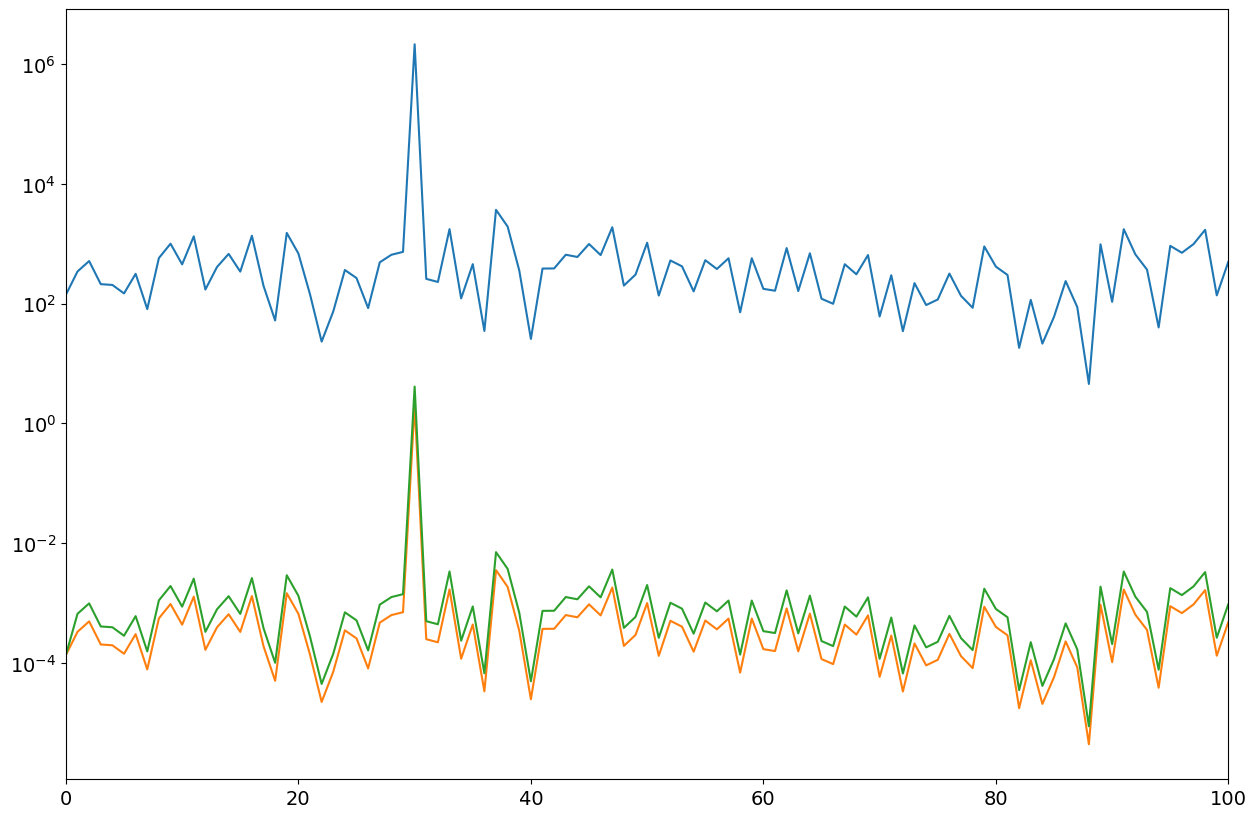

In [44]:
P1,ff = mSpectrum0(xx,nfft,fs)
P2,ff = mSpectrum0(xx,nfft,fs,"RMS")
P3,ff = mSpectrum0(xx,nfft,fs,"VAR")


fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff,P1);
plt.semilogy(ff,P2);
plt.semilogy(ff,P3);
plt.xlim(0,100);


## Windowing
The implementation of the FFT assumes that signal is periodic. Most interesting signals are aperiodic, resulting in what is called spectral leakage. The above signal with a frequency of 5.5 is such a case.

Standard remedy is to taper the signal such that both ends of the time series are equal and very often close to zero. A typical window is the Hann window, 

\begin{equation}
hann(n)=\frac{1}{2}\big(1-\cos(2\pi \frac{n}{N-1})\big)
\end{equation}

In the following we assume that the window length is equal to FFT length, that is we assume first NO zero padding and analyse later the case of zero padding


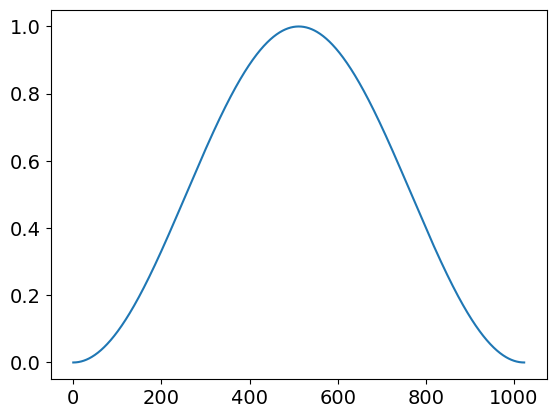

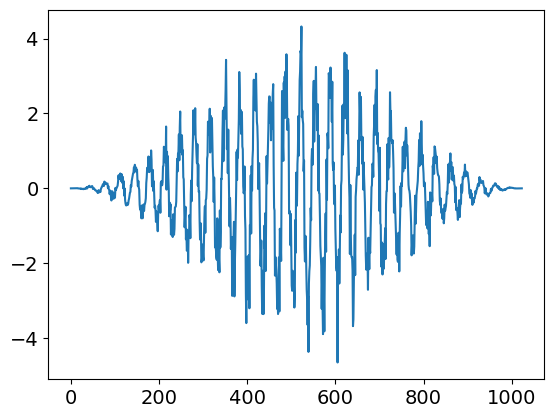

In [45]:
win=np.hanning(nwin)

plt.plot(win);
plt.show()
plt.plot(xx*win);
plt.show()

### Observations
Windowing reduces
- the influences of initial and final data
- the effective length of the data

### Conclusions
one should expect that
- the RMS value of the signal is modified
- the noise variance is modified

0.001 0.0003723485084048444
2 0.504950857253024


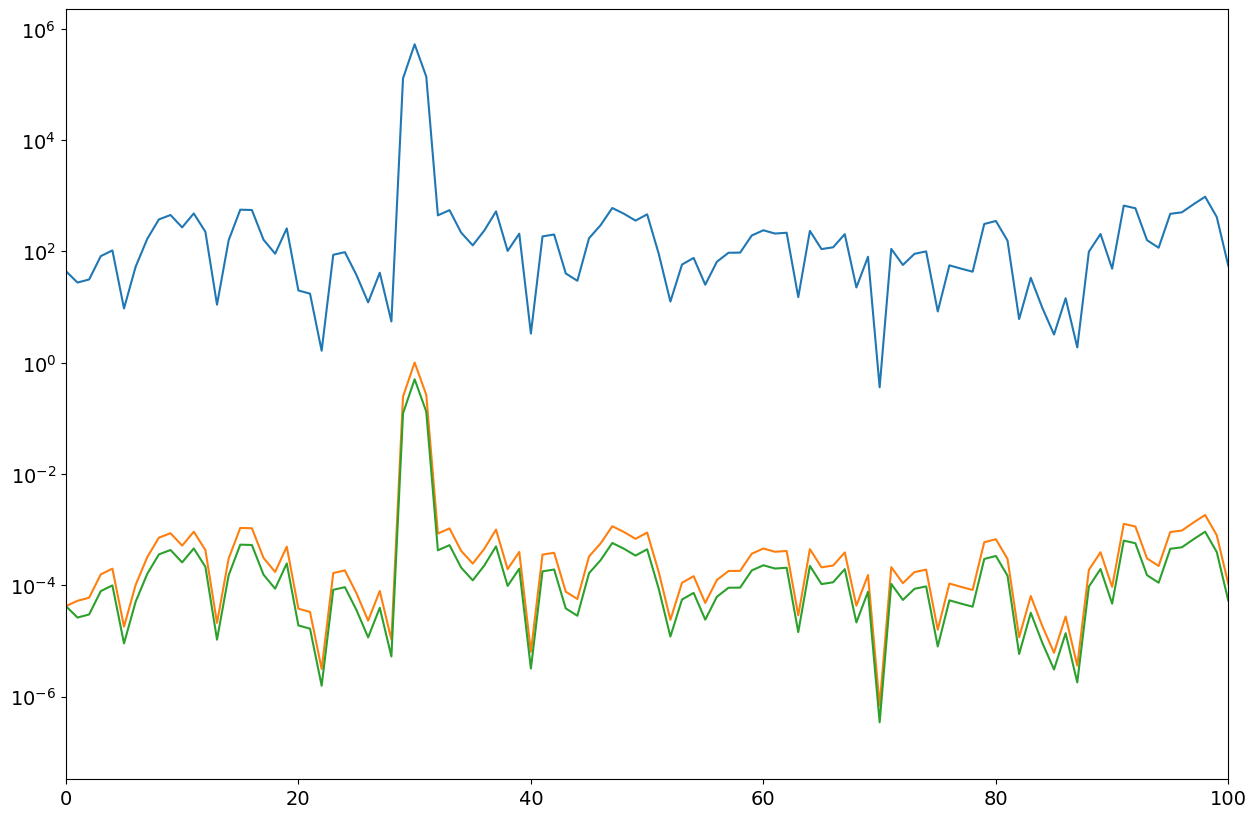

In [46]:
P11,ff = mSpectrum0(xx*win,nfft,fs)
P12,ff = mSpectrum0(xx*win,nfft,fs,"VAR") # for noise
P13,ff = mSpectrum0(xx*win,nfft,fs,"RMS") # for signal


fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff,P11);
plt.semilogy(ff,P12);
plt.semilogy(ff,P13);
plt.xlim(0,100)

print(var, np.mean(P12[50:]))
print(arms, np.max(P13))

### Observation
Both, the RMS estimate (peak value) and the per sample Var value (noise) are not correct. The obtained values are too low due to the windowing influence.
This can be corrected by considering the window shape.

In [47]:
print(np.mean(win*win))
print(np.mean(win))

print(var, np.mean(P12[50:])/np.mean(win*win))
print(arms, np.max(P13)/win.mean()**2)

0.3746337890625
0.49951171875
0.001 0.0009938999611770888
2 2.0237541438218987


In [48]:
# updated custom spectrum estimation
def mSpectrum1(xx,win,fs,mode=None):
    # xx: real valued time series if at least nfft samples
    # nfft: length of fft in samples
    # fs: sampling frequency
    # mode: RMS for scaling of spectral peakes to signal RMS
    #       VAR for scaling of spectral mean values to per sample variance
    #       None for power spectrum (FFT output) (Default)
    # output: P power estimates according to mode
    #         ff frequency vector
    nwin=len(win)
    nfft=nwin
    yy=np.fft.rfft(xx[:nwin]*win,nfft)
    ff=np.arange(int(nfft/2)+1)*fs/nfft

    pp=np.abs(yy)**2
    if mode=="RMS":
        return pp/win.sum()**2, ff
    elif mode=="VAR":
        pp[1:] *=2
        return pp/(nwin*(win*win).sum()), ff
    else:
        return pp, ff


0.001 0.0009938999611770886
2 2.0237541438218987


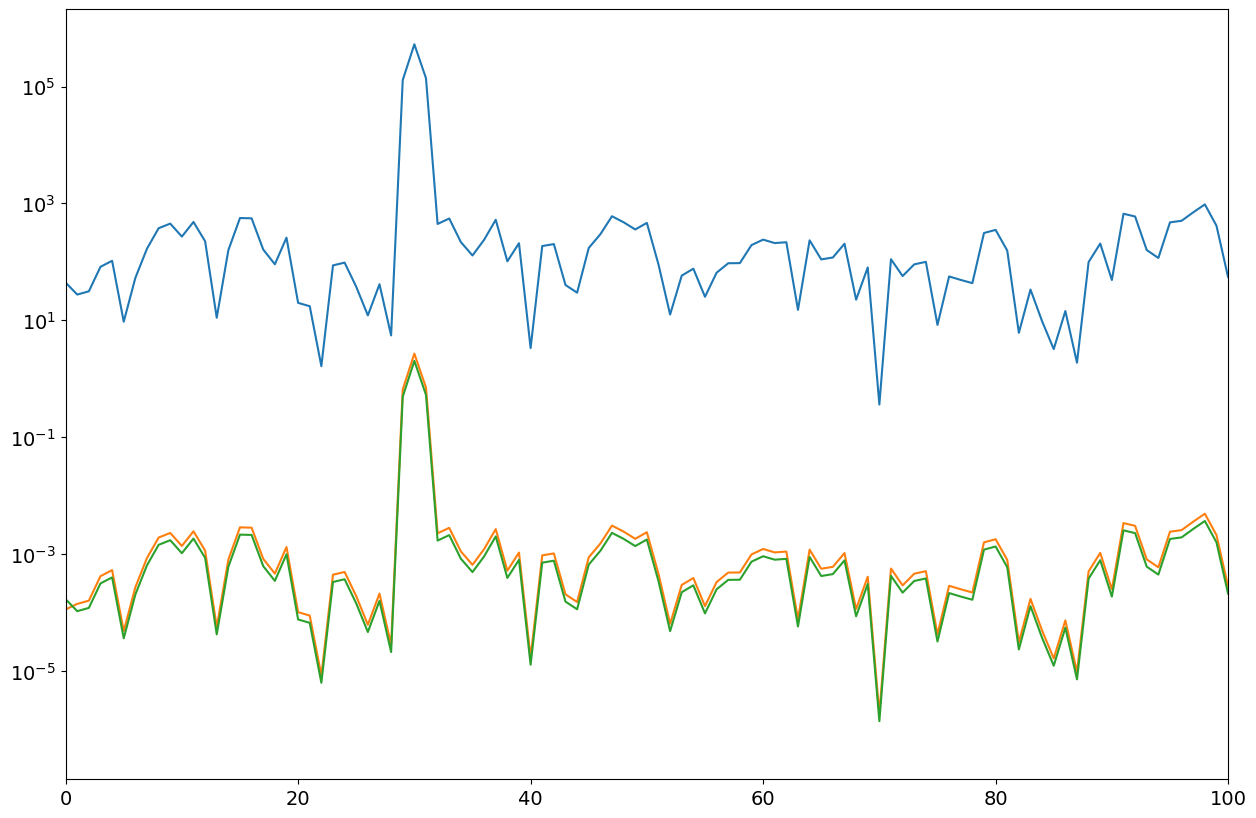

In [49]:
P21,ff = mSpectrum1(xx,win,fs)
P22,ff = mSpectrum1(xx,win,fs,"VAR")
P23,ff = mSpectrum1(xx,win,fs,"RMS")


fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff,P21);
plt.semilogy(ff,P22);
plt.semilogy(ff,P23);
plt.xlim(0,100)

# test estimates
print(var, np.mean(P22[50:]))
print(arms, np.max(P23))

### Observations

The general scaling functions of spectras are
- RMS estimation: `1/win.sum()**2`
- VAR estimation: `2/(nwin*(win*win).sum())`, whereby the factor 2 is only for nonzero frequencies

For rectangular windows (that is no windows) we have `win.sum()=nwin` and `(win*win).sum()=nwin` 



## Power spectral density (PSD)
The VAR estimation provides the per sample noise variance  expressed in V^2/sample . To obtain the PSD that typically is expressed in V^2/Hz one needs to consider the spectral binwidth in terms of the sampling frequency $f_s$.

Binwidth in Hz is for $N_{fft}= N_{win}$ given by

\begin{equation}
\Delta f = \frac{f_s}{N_{win}}
\end{equation}

and therfore the PSD related scaling of the spectra
- PSD estimation: `2/(nwin*(win*win).sum())*nwin/fs` or `2/(fs*(win*win).sum())`


## Zero padding
So far, we assumed that the length of the fft is equal to the length of the window. In the following we allow the fft length to be longer than the window length, wherby the added samples are kept at zero (zero padding).

529479.3500949469 529479.3500949468
196.51515894794395 196.4412729078609


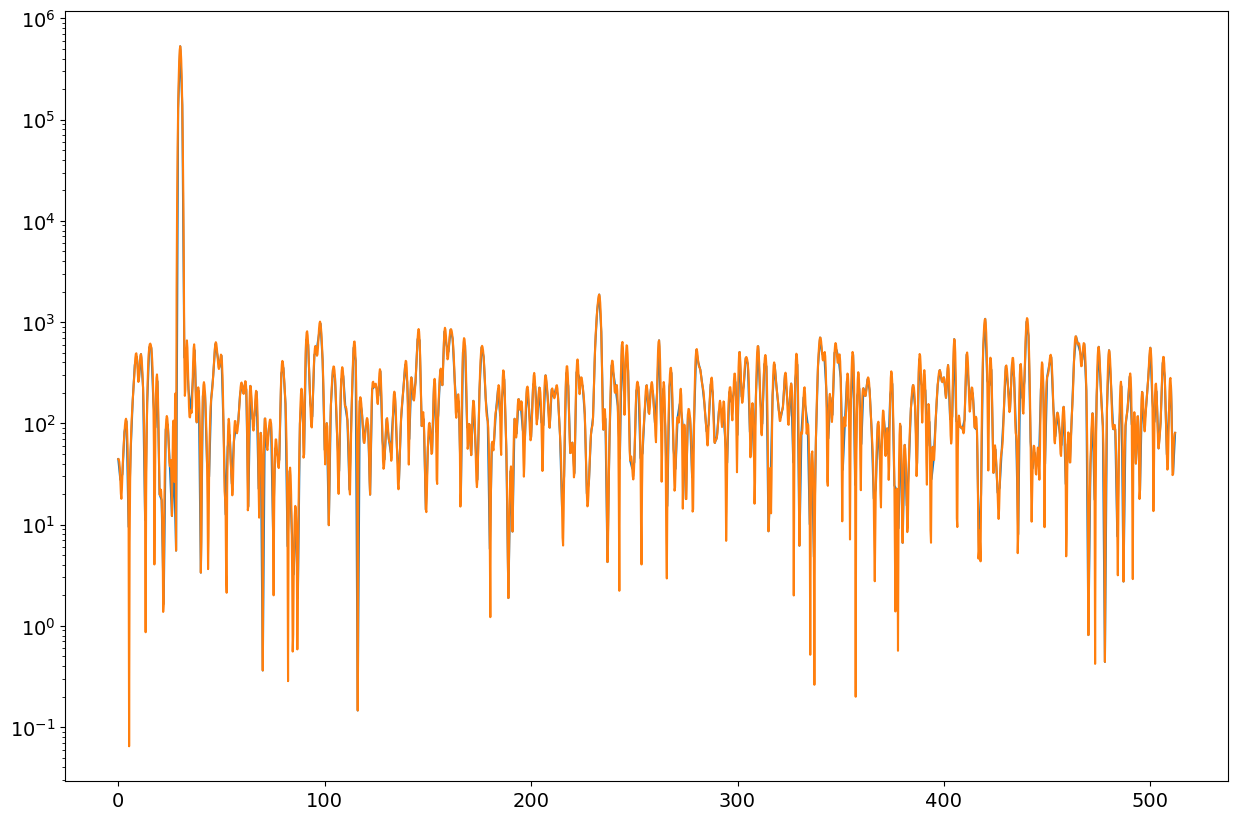

In [50]:
# case 1
nfft1=nwin
uu=xx[:nwin]*win
yy1=np.fft.rfft(uu,nfft1)
ff1=np.arange(int(nfft1/2)+1)*fs/nfft1

pp1=np.abs(yy1)**2

# case 2
nfft2=4*nwin
uu=np.zeros(nfft2)
uu[:nwin] = xx[:nwin]*win
yy2=np.fft.rfft(uu,nfft2)
ff2=np.arange(int(nfft2/2)+1)*fs/nfft2

pp2=np.abs(yy2)**2
    
fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff1,pp1);
plt.semilogy(ff2,pp2);

print(np.max(pp1),np.max(pp2))
print(np.mean(pp1[ff1>40]),np.mean(pp2[ff2>40]))

### Observations
We note that the unscaled spectra estimates do not vary when adding zeros to the data before FFT (zero padding). All what is changing is the number of frequency bins to cover the whole spectrum and consequently, zero padded FFTs are also called interpolationg FFT.

One should expect that scaling for the RMS estimate (peak of spectrogram) does not depend on length of zero padded FFT but only on length of window

#### Open question: does zero padding change the estimate of the PSD?

The PSD is given as the time averaged spectral energy
\begin{equation}
P(f) = \frac{1}{T}\Big|\int_{0}^{T}x(t)\exp{(-2\pi i f t)} dt\Big|^2
\end{equation}
or for discrete sampling
\begin{equation}
P(f) = \frac{1}{N\Delta t}\Big|\sum_{n=0}^{N-1}x(n)\exp{(-2\pi i f n\Delta t)} \Delta t\Big|^2
\end{equation}
where $N$ is the number of samples of the signal and $\Delta t$ is the sampling interval, i.e. $N\Delta t=T$ is the length of the signal in seconds and $n\Delta t$ is the time when the n-th samples was measured.

The quantity $P(f)$ is really a time averaged signal energy

Assume zero padding from $N$ to $K>N$, the sum does not change as $x(n)=0$ for all $n>N$, but the frequency interpretation does:

Assume $f_k =k(f_s/K)$ for $k=0,1, ...,K-1$ with $f_s = 1/\Delta t$

\begin{equation}
P(k) = P(\frac{kf_s}{K}) = \frac{1}{f_sN}\Big|\sum_{n=0}^{N-1}x(n)\exp{(-2\pi i kn/K)}\Big|^2
\end{equation}

The PSD is independent of the DFT size K, but it only depends on the number of time domain samples N

### Comment
Zero padding is only useful if one is interested in the interpolating aspect of the zero-padded FFT, e.g. for RMS estimates of tonal signals. For broadband PSD estimation zero-padded FFT seems of little advantage.

### Custom Spectrum implementation

In [51]:
# custom spectrum estimation
def mSpectrum(xx,win,fs,nfft,mode=None):
    # xx: real valued time series if at least nfft samples
    # nfft: length of fft in samples
    # fs: sampling frequency
    # mode: RMS for scaling of spectral peakes to signal RMS
    #       VAR for scaling of spectral mean values to per sample variance
    #       PSD for scaling of power spectral density to (v^2/Hz)
    #       None for power spectrum (FFT output) (Default)
    # output: P power estimates according to mode
    #         ff frequency vector
    nwin=len(win)
    if nfft<nwin: nfft=nwin # force nfft to be at least window length
    nfft=int(2**np.ceil(np.log2(nfft))) # increase nfft to next power of 2
    #
    # copy data to working buffer zero-pad if required
    uu=np.zeros(nfft)
    uu[:nwin]=xx[:nwin]*win
    
    yy=np.fft.rfft(uu,nfft)
    ff=np.arange(int(nfft/2)+1)*fs/nfft

    pp=np.abs(yy)**2
    if mode=="RMS":
        return pp/win.sum()**2, ff
    elif mode=="VAR":
        pp[1:] *=2
        return pp/(nwin*(win*win).sum()), ff
    elif mode=="PSD":
        pp[1:] *=2
        return pp/(fs*(win*win).sum()), ff
    else:
        return pp, ff


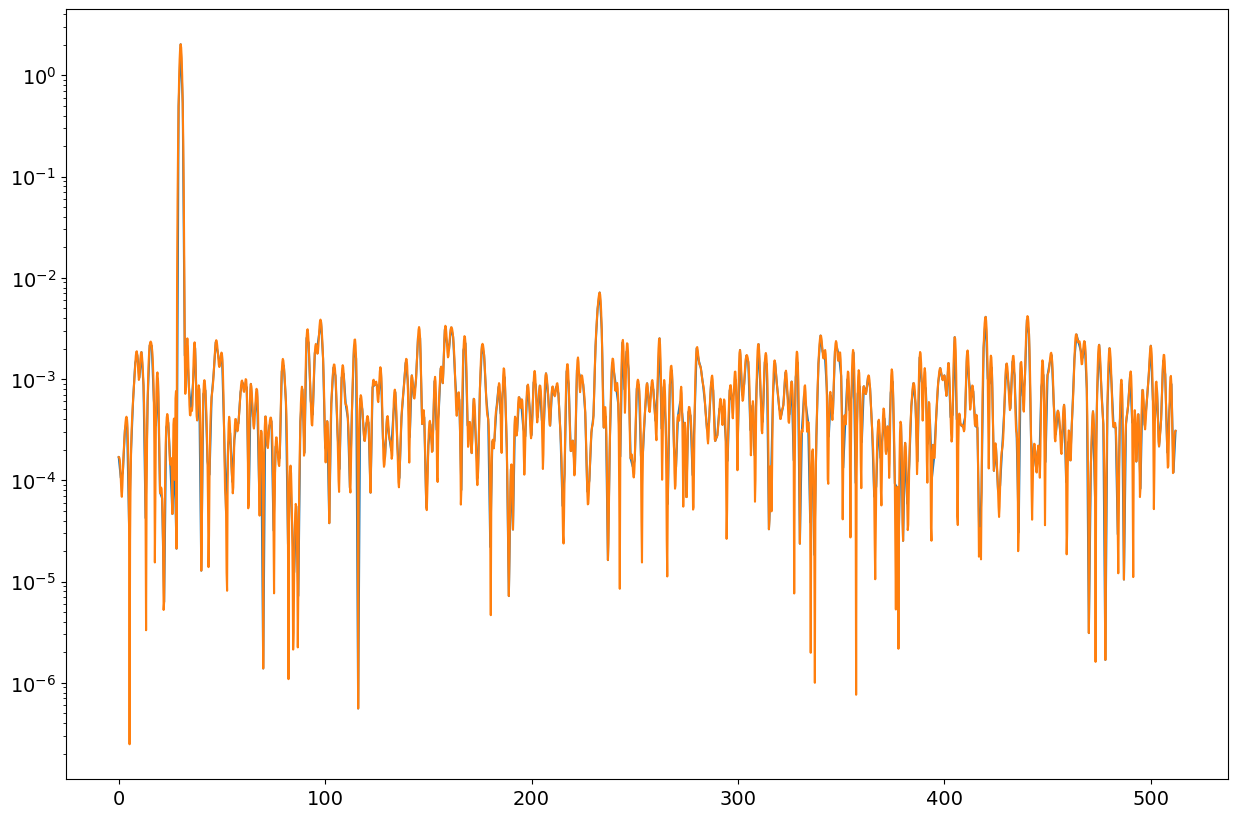

RMS:  2.0237541438218987 2.023754143821898


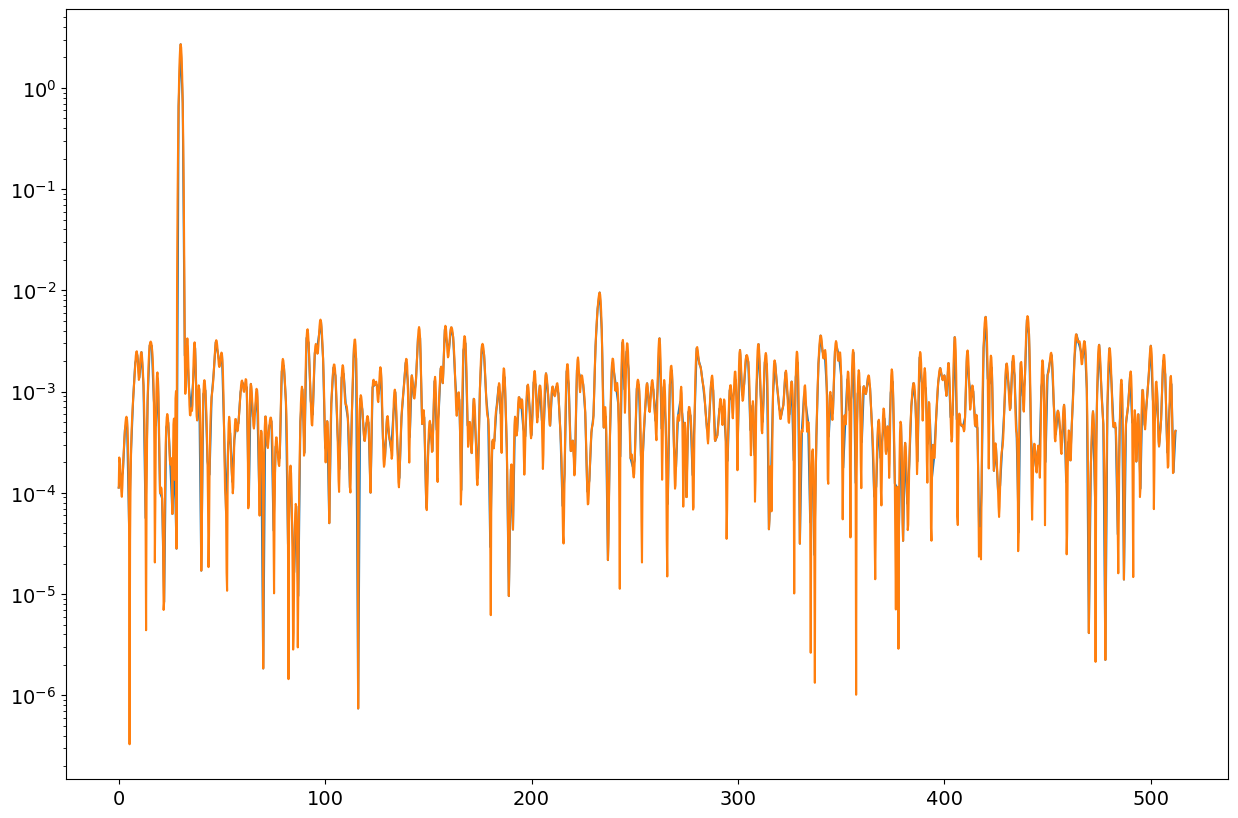

PSD:  0.0010005048414993888 0.0010001286703112827


In [52]:
# case 1
nfft1=nwin
# case 2
nfft2=4*nwin

#----------------------------------------------
pp1,ff1=mSpectrum(xx,win,fs,nfft1,"RMS")
pp2,ff2=mSpectrum(xx,win,fs,nfft2,"RMS")

fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff1,pp1);
plt.semilogy(ff2,pp2);
plt.show()

print("RMS: ",np.max(pp1),np.max(pp2))

#----------------------------------------------
pp1,ff1=mSpectrum(xx,win,fs,nfft1,"PSD")
pp2,ff2=mSpectrum(xx,win,fs,nfft2,"PSD")

fig = plt.figure("figure.figsize",[15,10])
plt.semilogy(ff1,pp1);
plt.semilogy(ff2,pp2);
plt.show()

print("PSD: ", np.mean(pp1[ff1>40]),np.mean(pp2[ff2>40]))